## Biases in seasonal climatologies - simulation A only

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.colors
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import itertools
import pandas as pd
import scipy.io
import cartopy

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

## Load data

In [2]:
# path to models
path_models = '/scratch/usr/shkifmmp/reccap2/'
# mask_reccap = xr.open_dataset('/scratch/usr/shkifmmp/reccap2/mask/reccap2ocean_regions.nc')
mask_reccap_SO = xr.open_dataset('/scratch/usr/shkifmmp/reccap2/mask/reccap_regions_SOsubs.nc').SO_basins_biomes

In [3]:
# CESM-ETHZ

CESM_ETHZ = xr.open_mfdataset(glob(path_models + 'CESM-ETHZ/seasonal_climatology/' + '*A*.nc'))

path_m_CESM_ETHZ = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/CESM-ETHZ/'
mask_CESM_ETHZ = xr.open_dataset(glob(path_m_CESM_ETHZ + 'ancillary*.nc')[0]).mask_sfc
area_CESM_ETHZ = xr.open_dataset(glob(path_m_CESM_ETHZ + 'ancillary*.nc')[0]).area

CESM_ETHZ = CESM_ETHZ.rename({'time_mon': 'time'})

In [4]:
CESM_ETHZ['talkos'] = CESM_ETHZ.talkos * 1020 *1e-6

In [5]:
# FESOM_REcoM_HR

FESOM_REcoM_HR = xr.open_mfdataset(glob(path_models + 'FESOM_REcoM_HR/seasonal_climatology/' + '*A*v20210712.nc'))

path_m_FESOM_REcoM_HR = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/FESOM_REcoM_HR/'
mask_FESOM_REcoM_HR = xr.open_dataset(glob(path_m_FESOM_REcoM_HR + 'mask_sfc*.nc')[0]).mask_sfc
area_FESOM_REcoM_HR = xr.open_dataset(glob(path_m_FESOM_REcoM_HR + 'area*.nc')[0]).area

FESOM_REcoM_HR = FESOM_REcoM_HR.rename({'Lat': 'lat', 'Lon': 'lon', 'Time': 'time'})
area_FESOM_REcoM_HR = area_FESOM_REcoM_HR.rename({'Lat': 'lat', 'Lon': 'lon'})
mask_FESOM_REcoM_HR = mask_FESOM_REcoM_HR.rename({'Lat': 'lat', 'Lon': 'lon'})

In [6]:
# FESOM_REcoM_LR

FESOM_REcoM_LR = xr.open_mfdataset(glob(path_models + 'FESOM_REcoM_LR/seasonal_climatology/' + '*A*v20210712.nc'))

path_m_FESOM_REcoM_LR = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/FESOM_REcoM_LR/'
mask_FESOM_REcoM_LR = xr.open_dataset(glob(path_m_FESOM_REcoM_LR + 'mask_sfc*.nc')[0]).mask_sfc
area_FESOM_REcoM_LR = xr.open_dataset(glob(path_m_FESOM_REcoM_LR + 'area*.nc')[0]).area

FESOM_REcoM_LR = FESOM_REcoM_LR.rename({'Lat': 'lat', 'Lon': 'lon', 'Time': 'time'})
area_FESOM_REcoM_LR = area_FESOM_REcoM_LR.rename({'Lat': 'lat', 'Lon': 'lon'})
mask_FESOM_REcoM_LR = mask_FESOM_REcoM_LR.rename({'Lat': 'lat', 'Lon': 'lon'})

In [37]:
# MOM6-COBALT2-Princeton

MOM6_COBALT2_Princeton = xr.open_mfdataset(glob(path_models + 'MOM6-COBALT2-Princeton/seasonal_climatology/' + '*A*.nc'))

path_m_MOM6_COBALT2_Princeton = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/MOM6-COBALT2-Princeton/'
mask_MOM6_COBALT2_Princeton = xr.open_dataset(glob(path_m_MOM6_COBALT2_Princeton + 'ancillary_data_grid*.nc')[0]).mask_sfc
area_MOM6_COBALT2_Princeton = xr.open_dataset(glob(path_m_MOM6_COBALT2_Princeton + 'ancillary_data_grid*')[0]).area

In [8]:
# ECCO-Darwin -- DO NOT USE IT (lavinia said not to, dont remember why)

# ECCO_Darwin = xr.open_mfdataset(glob(path_models + 'ECCO-Darwin/' + '*A*.nc'))

# path_m_ECCO_Darwin = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/ECCO-Darwin/'
# mask_ECCO_Darwin = xr.open_dataset(glob(path_m_ECCO_Darwin + 'mask_sfc*.nc')[0]).mask_sfc
# area_ECCO_Darwin = xr.open_dataset(glob(path_m_ECCO_Darwin + 'area_ECCO*.nc')[0]).area

# ECCO_Darwin = ECCO_Darwin.rename({'LATITUDE':'lat', 'LONGITUDE': 'lon', 'TIME': 'time'}) 
# area_ECCO_Darwin = area_ECCO_Darwin.rename({'LATITUDE':'lat', 'LONGITUDE': 'lon'}) 
# mask_ECCO_Darwin = mask_ECCO_Darwin.rename({'LATITUDE':'lat', 'LONGITUDE': 'lon'}) 

In [ ]:
# GOA-COBALT Gulf of Alaska

# GOA_COBALT = xr.open_mfdataset(glob(path_models + 'GOA-COBALT/' + '*A*.nc'))

# path_m_GOA_COBALT = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/GOA-COBALT/'
# mask_GOA_COBALT = xr.open_dataset(glob(path_m_GOA_COBALT + 'mask_sfc*.nc')[0]).mask_sfc
# area_GOA_COBALT = xr.open_dataset(glob(path_m_GOA_COBALT + 'area_GOA*.nc')[0]).area

In [ ]:
# MPIOM-HAMOCC -- MASK AND AREA MISSING -- DO NOT USE THIS ONE

# MPIOM_HAMOCC = xr.open_mfdataset(glob(path_models + 'MPIOM-HAMOCC/' + 'no3os*.nc'))

# NO MASK
# path_m_MPIOM_HAMOCC = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/MPIOM-HAMOCC/'
# mask_MPIOM_HAMOCC = xr.open_dataset(glob(path_m_MPIOM_HAMOCC + 'mask_sfc*.nc')[0]).mask_sfc
# area_MPIOM_HAMOCC = xr.open_dataset(glob(path_m_MPIOM_HAMOCC + 'area_ECCO*.nc')[0]).area

In [7]:
# MRI-ESM2-0

MRI_ESM2_0 = xr.open_mfdataset(glob(path_models + 'MRI-ESM2-0/seasonal_climatology/' + '*A*.nc'))

path_m_MRI_ESM2_0 = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/MRI-ESM2-0/'
mask_MRI_ESM2_0 = xr.open_dataset(glob(path_m_MRI_ESM2_0 + 'mask_sfc*.nc')[0]).mask_sfc
area_MRI_ESM2_0 = xr.open_dataset(glob(path_m_MRI_ESM2_0 + 'area_MRI*.nc')[0]).area

MRI_ESM2_0 = MRI_ESM2_0.drop(['time_bnds', 'lat_bnds', 'lon_bnds'])
MRI_ESM2_0 = MRI_ESM2_0.reset_coords(['type', 'depth'], drop=True)

In [8]:
# NorESM-OC1.2

NorESM_OC1_2 = xr.open_mfdataset(glob(path_models + 'NorESM-OC1.2/seasonal_climatology/' + '*A*.nc'))

path_m_NorESM_OC1_2 = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/NorESM-OC1.2/'
mask_NorESM_OC1_2 = xr.open_dataset(glob(path_m_NorESM_OC1_2 + 'mask_sfc*A*.nc')[0]).mask_sfc
area_NorESM_OC1_2 = xr.open_dataset(glob(path_m_NorESM_OC1_2 + 'area_*A*.nc')[0]).area 

NorESM_OC1_2 = NorESM_OC1_2.drop_dims(['bnds'])
NorESM_OC1_2.coords['time'] = NorESM_OC1_2.indexes['time'].to_datetimeindex()

In [369]:
# OCIM-v2014 -- NOT USING

# OCIM_v2014 = xr.open_mfdataset(glob(path_models + 'OCIM-v2014/' + '*A*tmp.nc'), decode_times=False)

# path_m_OCIM_v2014 = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/OCIM-v2014/'
# mask_OCIM_v2014 = xr.open_dataset(glob(path_m_OCIM_v2014 + 'mask_sfc*.nc')[0]).mask_sfc
# area_OCIM_v2014 = xr.open_dataset(glob(path_m_OCIM_v2014 + 'area_*.nc')[0]).area

In [9]:
# ORCA025-GEOMAR

ORCA025_GEOMAR = xr.open_mfdataset(glob(path_models + 'ORCA025-GEOMAR/seasonal_climatology/' + '*A*.nc'))

path_m_ORCA025_GEOMAR = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/ORCA025-GEOMAR/'
mask_ORCA025_GEOMAR = xr.open_dataset(glob(path_m_ORCA025_GEOMAR + 'mask_sfc*.nc')[0]).mask_sfc
area_ORCA025_GEOMAR = xr.open_dataset(glob(path_m_ORCA025_GEOMAR + 'area_ORCA*.nc')[0]).area

In [ ]:
# CNRM-ESM2-1 --- MASK MISSING -- DO NOT USE THIS ONE

# CNRM_ESM2_1 = xr.open_mfdataset(glob(path_models + 'CNRM-ESM2-1/' + '*A*.nc'))

# path_m_CNRM_ESM2_1 = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/CNRM-ESM2-1/'
# mask_CNRM_ESM2_1 = xr.open_dataset(glob(path_m_CNRM_ESM2_1 + 'mask_sfc*.nc')[0]).mask_sfc
# area_CNRM_ESM2_1 = xr.open_dataset(glob(path_m_CNRM_ESM2_1 + 'area_CNRM*.nc')[0]).area

In [10]:
# EC-Earth3

EC_Earth3 = xr.open_mfdataset(glob(path_models + 'EC-Earth3/seasonal_climatology/' + '*A*.nc'))

path_m_EC_Earth3 = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/EC-Earth3/'
mask_EC_Earth3 = xr.open_dataset(glob(path_m_EC_Earth3 + 'mask_sfc*.nc')[0]).mask_sfc.squeeze()
area_EC_Earth3 = xr.open_dataset(glob(path_m_EC_Earth3 + 'area_EC*.nc')[0]).cell_area

EC_Earth3 = EC_Earth3.drop_dims(['bnds'])
EC_Earth3.coords['time'] = EC_Earth3.indexes['time'].to_datetimeindex()
EC_Earth3 = EC_Earth3.reset_coords(['depth'], drop=True)
EC_Earth3 = EC_Earth3.rename({'mlotst': 'mld'})
mask_EC_Earth3 = mask_EC_Earth3.reset_coords(['time', 'lev'], drop= True)

### Correcting mask_reccap -- using Cara's mask

In [11]:
mask_SO = mask_reccap_SO.sel(lon=slice(0,180)) 

mask_SO_aux = mask_reccap_SO.sel(lon=slice(-180,0))

mask_SO_aux['lon'] = mask_SO_aux.lon + 360

mask_SO = xr.concat(objs = [mask_SO, mask_SO_aux], dim = 'lon')

### Observations

In [12]:
path_obs_lav = '/scratch/usr/shklvn09/SDIR/RECCAP-2/Observations/SOMFFN_v2020/'
path_obs_mar = '/scratch/usr/shkifmmp/reccap2/observations/'

In [13]:
dxdy_aux = scipy.io.loadmat(glob(path_obs_mar + '1x1*.mat')[0])

In [8]:
# dxdy_aux['dx'].shape

(180, 360)

In [14]:
dxdy = xr.Dataset(
    data_vars=dict(
        dx=(['lat','lon'], dxdy_aux['dx']),
        dy=(['lat','lon'], dxdy_aux['dy']))) # (['dimension', 'dimension'], variable)

In [15]:
area_1x1 = dxdy.dx * dxdy.dy

area_1x1.coords['lat'] = ('lat', mask_SO.coords['lat'].values)
area_1x1.coords['lon'] = ('lon', mask_SO.coords['lon'].values)

In [16]:
time = pd.date_range(start='1980-01-16', periods=456, freq='M')

In [17]:
sos_ob = xr.open_mfdataset(glob(path_obs_lav + 'sss*nc'), decode_times=False).sss

sos_ob = sos_ob.transpose()

sos_ob.coords['time'] = time

sos_ob = sos_ob.groupby("time.month").mean().rename({'month': 'time'})

In [18]:
mask_sss_obs = sos_ob.isel(time=4).squeeze().copy()

mask_sss_obs = mask_sss_obs.where(np.isnan(mask_sss_obs), other=1)

mask_sss_obs = mask_sss_obs.where(mask_sss_obs == 1, other=0)

In [19]:
tos_ob = xr.open_mfdataset(glob(path_obs_lav + 'sst*nc'), decode_times=False).sst.where(mask_sss_obs)

tos_ob = tos_ob.transpose()

tos_ob.coords['time'] = time

tos_ob = tos_ob.groupby("time.month").mean().rename({'month': 'time'})

In [20]:
spco2_ob = xr.open_mfdataset(glob(path_obs_lav + 'spco2*nc'), decode_times=False).spco2

spco2_ob = spco2_ob.transpose()

spco2_ob.coords['time'] = time

spco2_ob = spco2_ob.groupby("time.month").mean().rename({'month': 'time'})

In [21]:
fice_ob = xr.open_mfdataset(glob(path_obs_lav + 'fice*nc'), decode_times=False).fice

fice_ob = fice_ob.transpose()

fice_ob.coords['time'] = time

fice_ob = fice_ob.groupby("time.month").mean().rename({'month': 'time'})

In [22]:
dic_aux = xr.open_mfdataset(glob(path_obs_mar + 'MOB*nc')).DIC.isel(depth=0).squeeze()

dic_aux = dic_aux.reset_coords(['depth'], drop=True)
dic_aux = dic_aux.rename({'month': 'time'})

In [23]:
dic = dic_aux.sel(lon=slice(0,180)) 

dic_aux2 = dic_aux.sel(lon=slice(-180,0))

dic_aux2['lon'] = dic_aux2.lon + 360

dissicos_ob = xr.concat(objs = [dic, dic_aux2], dim = 'lon')

dissicos_ob = dissicos_ob * 1020 * 1e-6 #micromol/kg to mol/m3

dissicos_ob = dissicos_ob.where(dissicos_ob > 0,other=np.nan) #masking land

In [24]:
mld_aux = scipy.io.loadmat(glob(path_obs_mar + 'm*.mat')[0])

In [25]:
# mld_aux = scipy.io.loadmat(glob(path_obs_mar + 'm*.mat')[0])

mld = xr.Dataset(
    data_vars=dict(
        mld=(['time','lat','lon'], mld_aux['mld_int'])))

mld_ob = mld.mld

mld_ob.coords['lat'] = ('lat', mask_SO.coords['lat'].values)
mld_ob.coords['lon'] = ('lon', mask_SO.coords['lon'].values)

mld_ob.coords['time'] = CESM_ETHZ.coords['time']

In [26]:
alk = xr.open_mfdataset(glob(path_obs_mar + 'AT*nc')).AT_NNGv2.isel(depth_level=0)

alk = alk.transpose()
alk = alk.rename({'latitude': 'lat',
                 'longitude': 'lon'})

alk.coords['time'] = CESM_ETHZ.coords['time']

alk = alk * 1020 * 1e-6 #micromol/kg to mol/m3

alk_aux = alk.sel(lon=slice(0,180)) 
alk_aux1 = alk.sel(lon=slice(-180,0))
alk_aux1['lon'] = alk_aux1.lon + 360
talkos_ob = xr.concat(objs = [alk_aux, alk_aux1], dim = 'lon')

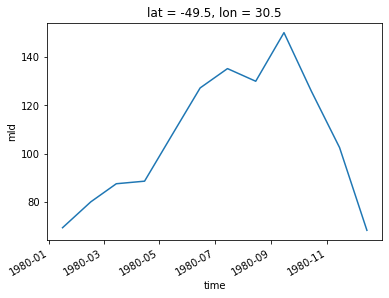

In [27]:
# mld_ob.isel(lat=40, lon=30).plot()

In [28]:
po4 = xr.open_mfdataset(glob(path_obs_mar + 'AT*nc')).phosphate.isel(depth_level=0)
po4 = po4.transpose()
po4 = po4.rename({'latitude': 'lat',
                 'longitude': 'lon'})

po4.coords['time'] = CESM_ETHZ.coords['time']

po4 = po4 * 1020 * 1e-6 #micromol/kg to mol/m3

po4_aux = po4.sel(lon=slice(0,180)) 
po4_aux1 = po4.sel(lon=slice(-180,0))
po4_aux1['lon'] = po4_aux1.lon + 360
po4os_ob = xr.concat(objs = [po4_aux, po4_aux1], dim = 'lon')

In [29]:
no3 = xr.open_mfdataset(glob(path_obs_mar + 'AT*nc')).nitrate.isel(depth_level=0)
no3 = no3.transpose()
no3 = no3.rename({'latitude': 'lat',
                 'longitude': 'lon'})

no3.coords['time'] = CESM_ETHZ.coords['time']

no3 = no3 * 1020 * 1e-6 #micromol/kg to mol/m3

no3_aux = no3.sel(lon=slice(0,180)) 
no3_aux1 = no3.sel(lon=slice(-180,0))
no3_aux1['lon'] = no3_aux1.lon + 360
no3os_ob = xr.concat(objs = [no3_aux, no3_aux1], dim = 'lon')

In [30]:
obs = {'po4os_ob': po4os_ob, 'no3os_ob': no3os_ob, 'talkos_ob': talkos_ob, 'spco2_ob':spco2_ob, 
       'dissicos_ob': dissicos_ob, 'tos_ob': tos_ob, 'sos_ob': sos_ob, 'fice_ob': fice_ob, 'mld_ob': mld_ob}

In [31]:
for d in obs:
    obs[d].coords['time'] = CESM_ETHZ.coords['time']

In [32]:
# also using for the obs
def weighted_mean_obs(variable, weight):
    return (variable * weight).sum(('lat','lon')) / weight.sum(('lat', 'lon'))

In [33]:
suffix = ['_atl_STSS', '_atl_SPSS', '_atl_ICE', '_ind_STSS', '_ind_SPSS', '_ind_ICE', '_pac_STSS', '_pac_SPSS', '_pac_ICE']

for d, i in itertools.product(obs, np.arange(0,9)):        #nested loop; globals() get the variables with the specified string_name or create if not existent
    data = obs[d]
    
    if (d == 'po4os_ob') or (d == 'no3os_ob') or (d == 'alk'):
        area_wm = area_1x1.where((area_1x1.lat <= po4.lat.max().values) & (area_1x1.lat >= po4.lat.min().values),drop=True)
        mask_wm = mask_SO.where((mask_SO.lat <= po4.lat.max().values) & (mask_SO.lat >= po4.lat.min().values), drop=True)
        
    elif d == 'dissicos_ob':
        area_wm = area_1x1.where((area_1x1.lat <= dic.lat.max().values) & (area_1x1.lat >= dic.lat.min().values),drop=True)
        mask_wm = mask_SO.where((mask_SO.lat <= dic.lat.max().values) & (mask_SO.lat >= dic.lat.min().values), drop=True)
        
    else:
        area_wm = area_1x1
        mask_wm = mask_SO
        
    globals()[d + suffix[i]] = weighted_mean_obs(data.where(mask_wm == i), 
                                                 area_wm.where(mask_wm == i))

### Computing weighted mean

In [34]:
# also using for the obs
def weighted_mean(variable, weight, mask):
    return (variable.where(mask) * weight.where(mask)).sum(('lat','lon')) / weight.sum(('lat', 'lon'))

In [38]:
#dictionary for the models
models = {'CESM_ETHZ': CESM_ETHZ, 'FESOM_REcoM_HR': FESOM_REcoM_HR, 'FESOM_REcoM_LR': FESOM_REcoM_LR, 'MOM6_COBALT2_Princeton': MOM6_COBALT2_Princeton,
         'MRI_ESM2_0': MRI_ESM2_0, 'NorESM_OC1_2': NorESM_OC1_2, 
         'ORCA025_GEOMAR': ORCA025_GEOMAR, 'EC_Earth3': EC_Earth3}

In [39]:
# making all models to have same time coordinates, otherwise it cannot compute mean properly
for m in models:
    models[m].coords['time'] = CESM_ETHZ.coords['time']

In [40]:
# weight mean of all models for all variables in the different basins and biomes
suffix = ['_atl_STSS', '_atl_SPSS', '_atl_ICE', '_ind_STSS', '_ind_SPSS', '_ind_ICE', '_pac_STSS', '_pac_SPSS', '_pac_ICE']

for m, i in itertools.product(models, np.arange(0,9)):        #nested loop; globals() get the variables with the specified string_name or create if not existent
    mod = models[m]
    globals()[m + suffix[i]] = weighted_mean(mod.where(mask_SO == i), 
                               globals()['area_' + m].where(mask_SO == i), 
                               globals()['mask_' + m].where(mask_SO == i))

In [41]:
# create varibles by variables name, instead of by models name in order to do mean, std and plots

pref = [*CESM_ETHZ.keys()]
for i, j in itertools.product(np.arange(0,9), pref):
    
    #FESOMs do not have po4os; EC_Earth does not have fice
    if j == 'po4os':
        globals()[j + suffix[i]] = xr.Dataset(data_vars = dict(CESM_ETHZ = globals()[[*models][0] + suffix[i]][j],
                                                       EC_Earth3 = globals()[[*models][7] + suffix[i]][j],
                                                       MOM6_COBALT2_Princeton = globals()[[*models][3] + suffix[i]][j],
                                                       ORCA025_GEOMAR = globals()[[*models][6] + suffix[i]][j],
#                                                        ECCO_Darwin = globals()[[*models][4] + suffix[i]][j],
                                                       MRI_ESM2_0 = globals()[[*models][4] + suffix[i]][j],
                                                       NorESM_OC1_2 = globals()[[*models][5] + suffix[i]][j]))
    elif j == 'fice':
        globals()[j + suffix[i]] = xr.Dataset(data_vars = dict(CESM_ETHZ = globals()[[*models][0] + suffix[i]][j],
                                                       FESOM_REcoM_HR = globals()[[*models][1] + suffix[i]][j],
                                                       FESOM_REcoM_LR = globals()[[*models][2] + suffix[i]][j],
                                                       MOM6_COBALT2_Princeton = globals()[[*models][3] + suffix[i]][j],
                                                       ORCA025_GEOMAR = globals()[[*models][6] + suffix[i]][j],
#                                                        ECCO_Darwin = globals()[[*models][4] + suffix[i]][j],
                                                       MRI_ESM2_0 = globals()[[*models][4] + suffix[i]][j],
                                                       NorESM_OC1_2 = globals()[[*models][5] + suffix[i]][j]))
    else:
        globals()[j + suffix[i]] = xr.Dataset(data_vars = dict(CESM_ETHZ = globals()[[*models][0] + suffix[i]][j],
                                                       FESOM_REcoM_HR = globals()[[*models][1] + suffix[i]][j],
                                                       FESOM_REcoM_LR = globals()[[*models][2] + suffix[i]][j],
                                                       EC_Earth3 = globals()[[*models][7] + suffix[i]][j],
                                                       MOM6_COBALT2_Princeton = globals()[[*models][3] + suffix[i]][j],
                                                       ORCA025_GEOMAR = globals()[[*models][6] + suffix[i]][j],
#                                                        ECCO_Darwin = globals()[[*models][4] + suffix[i]][j],
                                                       MRI_ESM2_0 = globals()[[*models][4] + suffix[i]][j],
                                                       NorESM_OC1_2 = globals()[[*models][5] + suffix[i]][j]))

In [42]:
# correcting some data

#fice

fice_atl_STSS['NorESM_OC1_2'] = fice_atl_STSS.NorESM_OC1_2.where(fice_atl_STSS.NorESM_OC1_2 >= 0, other=0)
fice_pac_STSS['NorESM_OC1_2'] = fice_pac_STSS.NorESM_OC1_2.where(fice_pac_STSS.NorESM_OC1_2 >= 0, other=0)
fice_ind_STSS['NorESM_OC1_2'] = fice_ind_STSS.NorESM_OC1_2.where(fice_ind_STSS.NorESM_OC1_2 >= 0, other=0)

In [43]:
# getting mean and std of variables
for i, j in itertools.product(np.arange(0,9), pref):
    var_aux = globals()[j + suffix[i]]
    mean_v = var_aux.to_array(dim='new').mean('new') #it creates a relationship between the different variables by new dimension and do the mean in that dim
    std_v = var_aux.to_array(dim='new').std('new') #for standard deviation
    data_obs = globals()[j + '_ob' + suffix[i]] # getting the observational data
    globals()[j + suffix[i]] = var_aux.assign(mod_mean = mean_v, mod_std = std_v, obs = data_obs) # adding variables to DataSet

In [82]:
# create varibles by variables name, instead of by models name in order to do mean, std and plots
for i, j in itertools.product(np.arange(0,9), pref):
    var_aux = globals()[j + suffix[i]]
    
    #FESOMs do not have po4os; EC_Earth does not have fice
    if j == 'fice':
        globals()[j + '_anom_'+ suffix[i]] = xr.Dataset(data_vars = dict(CESM_ETHZ = var_aux['CESM_ETHZ']- var_aux['CESM_ETHZ'].mean('time'),
                                                       FESOM_REcoM_HR = var_aux['FESOM_REcoM_HR']- var_aux['FESOM_REcoM_HR'].mean('time'),
                                                       FESOM_REcoM_LR = var_aux['FESOM_REcoM_LR']- var_aux['FESOM_REcoM_LR'].mean('time'),
                                                       MOM6_COBALT2_Princeton = var_aux['MOM6_COBALT2_Princeton']- var_aux['MOM6_COBALT2_Princeton'].mean('time'),
                                                       ORCA025_GEOMAR = var_aux['ORCA025_GEOMAR']- var_aux['ORCA025_GEOMAR'].mean('time'),
                                                       MRI_ESM2_0 = var_aux['MRI_ESM2_0']- var_aux['MRI_ESM2_0'].mean('time'),
                                                       NorESM_OC1_2 = var_aux['NorESM_OC1_2']- var_aux['NorESM_OC1_2'].mean('time')))
    elif j == 'po4os':
        globals()[j + '_anom_'+ suffix[i]] = xr.Dataset(data_vars = dict(CESM_ETHZ = var_aux['CESM_ETHZ']- var_aux['CESM_ETHZ'].mean('time'),
                                                       EC_Earth3 = var_aux['EC_Earth3']- var_aux['EC_Earth3'].mean('time'),
                                                       MOM6_COBALT2_Princeton = var_aux['MOM6_COBALT2_Princeton']- var_aux['MOM6_COBALT2_Princeton'].mean('time'),
                                                       ORCA025_GEOMAR = var_aux['ORCA025_GEOMAR']- var_aux['ORCA025_GEOMAR'].mean('time'),
                                                       MRI_ESM2_0 = var_aux['MRI_ESM2_0']- var_aux['MRI_ESM2_0'].mean('time'),
                                                       NorESM_OC1_2 = var_aux['NorESM_OC1_2']- var_aux['NorESM_OC1_2'].mean('time')))
    
    else:
        globals()[j + '_anom_'+ suffix[i]] = xr.Dataset(data_vars = dict(CESM_ETHZ = var_aux['CESM_ETHZ']- var_aux['CESM_ETHZ'].mean('time'),
                                                       FESOM_REcoM_HR = var_aux['FESOM_REcoM_HR']- var_aux['FESOM_REcoM_HR'].mean('time'),
                                                       FESOM_REcoM_LR = var_aux['FESOM_REcoM_LR']- var_aux['FESOM_REcoM_LR'].mean('time'),
                                                       EC_Earth3 = var_aux['EC_Earth3']- var_aux['EC_Earth3'].mean('time'),
                                                       MOM6_COBALT2_Princeton = var_aux['MOM6_COBALT2_Princeton']- var_aux['MOM6_COBALT2_Princeton'].mean('time'),
                                                       ORCA025_GEOMAR = var_aux['ORCA025_GEOMAR']- var_aux['ORCA025_GEOMAR'].mean('time'),
                                                       MRI_ESM2_0 = var_aux['MRI_ESM2_0']- var_aux['MRI_ESM2_0'].mean('time'),
                                                       NorESM_OC1_2 = var_aux['NorESM_OC1_2']- var_aux['NorESM_OC1_2'].mean('time')))
    
    var_aux_2 = globals()[j + '_anom_'+ suffix[i]]
    std_anom = var_aux_2.to_array(dim='new').std('new')
    globals()[j + suffix[i]] = var_aux.assign(mod_std_anom = std_anom)

### Plotting

In [76]:
ticks = [np.datetime64('1980-%02d-15'%month) for month in range(1, 13)] # for plotting all the months (ticks)
month_fmt = mdates.DateFormatter('%b')
def m_fmt(x, pos=None): #getting only first letter of Month
    return month_fmt(x)[0]

def plot_timeseries(prefix):
    "Function for plotting          "
    "prefix = variable to be plotted"
    pref = prefix
    models_plot = models.copy()
    axis_lim = np.zeros((3,3))
    axis_lim_min = np.zeros((3,3))
    #to remove from models list if the models does not have the specific variable
    if pref == 'po4os':
        rem_list = ['FESOM_REcoM_LR', 'FESOM_REcoM_HR']
        [models_plot.pop(key, None) for key in rem_list]
    if pref == 'fice':
        models_plot.pop('EC_Earth3', None)
        
    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (24,15))    
    
    for j in np.arange(0,3):
        dic_atl = globals()[pref + suffix[j]]
        dic_ind = globals()[pref + suffix[j+3]]
        dic_pac = globals()[pref + suffix[j+6]]

    # Atl
    
        for m in models_plot:
            dic_atl[m].plot(ax=axs[j,0], linewidth = 1.5)
        dic_atl.mod_mean.plot(ax=axs[j,0], color = 'k', linewidth = 3.5)
#         axs[j,0].fill_between(dic_atl.time.values, dic_atl.mod_mean - dic_atl.mod_std, 
#                          dic_atl.mod_mean + dic_atl.mod_std, alpha = 0.1, color ='tab:gray')
        axs[j,0].set_xlabel(None)
        axs[j,0].margins(x=0)
        axis_lim_min[j,0] = axs[j,0].get_ylim()[0]
        axis_lim[j,0] = axs[j,0].get_ylim()[1]
        
        
        # y_labels
        if prefix == 'dissicos':
            axs[j,0].set_ylabel('DISSICOS (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'fice':
            axs[j,0].set_ylabel('FICE', fontsize = 15)
        if prefix == 'spco2':
            axs[j,0].set_ylabel('SPCO2 ($\mu$atm)', fontsize = 15)
        if prefix == 'tos':
            axs[j,0].set_ylabel('TOS ($^{\circ}$C)', fontsize = 15)
        if prefix == 'sos':
            axs[j,0].set_ylabel('SOS', fontsize = 15)
        if prefix == 'no3os':
            axs[j,0].set_ylabel('NO3OS (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'po4os':
            axs[j,0].set_ylabel('PO4OS (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'mld':
            axs[j,0].set_ylabel('MLD (m)', fontsize = 15)
        if prefix == 'talkos':
            axs[j,0].set_ylabel('TALKOS (mol m$^{-3}$)', fontsize = 15)

    # Ind
        for m in models_plot:
            dic_ind[m].plot(ax=axs[j,1], linewidth = 1.5)
        dic_ind.mod_mean.plot(ax=axs[j,1], color = 'k', linewidth = 3.5)
#         axs[j,1].fill_between(dic_ind.time.values, dic_ind.mod_mean - dic_ind.mod_std, 
#                          dic_ind.mod_mean + dic_ind.mod_std, alpha = 0.1, color ='tab:gray')
        axs[j,1].set_ylabel(None)
        axs[j,1].set_xlabel(None)
        axs[j,1].margins(x=0)
        axis_lim_min[j,1] = axs[j,1].get_ylim()[0]
        axis_lim[j,1] = axs[j,1].get_ylim()[1]

    # Pac
        for m in models_plot:
            dic_pac[m].plot(ax=axs[j,2], linewidth = 1.5, label = m)
        dic_pac.mod_mean.plot(ax=axs[j,2], color = 'k', linewidth = 3.5, label = 'Mean')
#         axs[j,2].fill_between(dic_pac.time.values, dic_pac.mod_mean - dic_pac.mod_std, 
#                          dic_pac.mod_mean + dic_pac.mod_std, alpha = 0.1, color ='tab:gray')
        axs[j,2].set_ylabel(None)
        axs[j,2].set_xlabel(None)
        axs[j,2].margins(x=0)
        axis_lim_min[j,2] = axs[j,2].get_ylim()[0]
        axis_lim[j,2] = axs[j,2].get_ylim()[1]

        
    # adding text to the plot
    axs[0,0].text(0.01, 0.03,'STSS-Atl', color='k', transform=axs[0,0].transAxes, fontsize = 16)
    axs[1,0].text(0.01, 0.03,'SPSS-Atl', color='k', transform=axs[1,0].transAxes, fontsize = 16)
    axs[2,0].text(0.01, 0.03,'ICE-Atl', color='k', transform=axs[2,0].transAxes, fontsize = 16)
    
    axs[0,1].text(0.01, 0.03,'STSS-Ind', color='k', transform=axs[0,1].transAxes, fontsize = 16)
    axs[1,1].text(0.01, 0.03,'SPSS-Ind', color='k', transform=axs[1,1].transAxes, fontsize = 16)
    axs[2,1].text(0.01, 0.03,'ICE-Ind', color='k', transform=axs[2,1].transAxes, fontsize = 16)
        
    axs[0,2].text(0.01, 0.03,'STSS-Pac', color='k', transform=axs[0,2].transAxes, fontsize = 16)
    axs[1,2].text(0.01, 0.03,'SPSS-Pac', color='k', transform=axs[1,2].transAxes, fontsize = 16)
    axs[2,2].text(0.01, 0.03,'ICE-Pac', color='k', transform=axs[2,2].transAxes, fontsize = 16)  
    
    #ticks parameters
    for i in np.arange(0,3):
        axs[0,i].set_ylim(bottom = axis_lim_min[0,:].min(), top = axis_lim[0,:].max())
        axs[1,i].set_ylim(bottom = axis_lim_min[1,:].min(), top = axis_lim[1,:].max())
        
        if pref == 'mld':
            axs[2,i].set_ylim(bottom = axis_lim_min[2,:].min(), top = 800)
        else:
            axs[2,i].set_ylim(bottom = axis_lim_min[2,:].min(), top = axis_lim[2,:].max())
#         axs[0,i].set_xticks(ticks)
#         axs[0,i].xaxis.set_ticklabels([])
#         axs[1,i].set_xticks(ticks)
#         axs[1,i].xaxis.set_ticklabels([])
#         axs[2,i].xaxis.set_tick_params(rotation=0, labelsize = 15)
#         axs[2,i].set_xticks(ticks)
#         axs[2,i].xaxis.set_major_locator(mdates.DayLocator(bymonthday = [16,15]))
#         axs[2,i].xaxis.set_major_formatter(mticker.FuncFormatter(m_fmt))
    
    
    for ax in axs.flat:
        ax.yaxis.set_tick_params(labelsize = 13)
        ax.grid()
        ax.xaxis.set_tick_params(rotation=0, labelsize = 15)
        ax.set_xticks(ticks)
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(m_fmt))
    
    #adding legend next to the plot
    leg = axs[0,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=15)
    
    for line in leg.get_lines():
        line.set_linewidth(2.7)
    
    savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
    plt.savefig(savepath + 'reccap2_' + pref + '_timeseries.png', format='png', facecolor="w",  bbox_inches='tight')
#     plt.tight_layout()
# ax.xaxis.set_major_locator(MonthLocator())
# ax.xaxis.set_major_formatter(FuncFormatter(m_fmt))

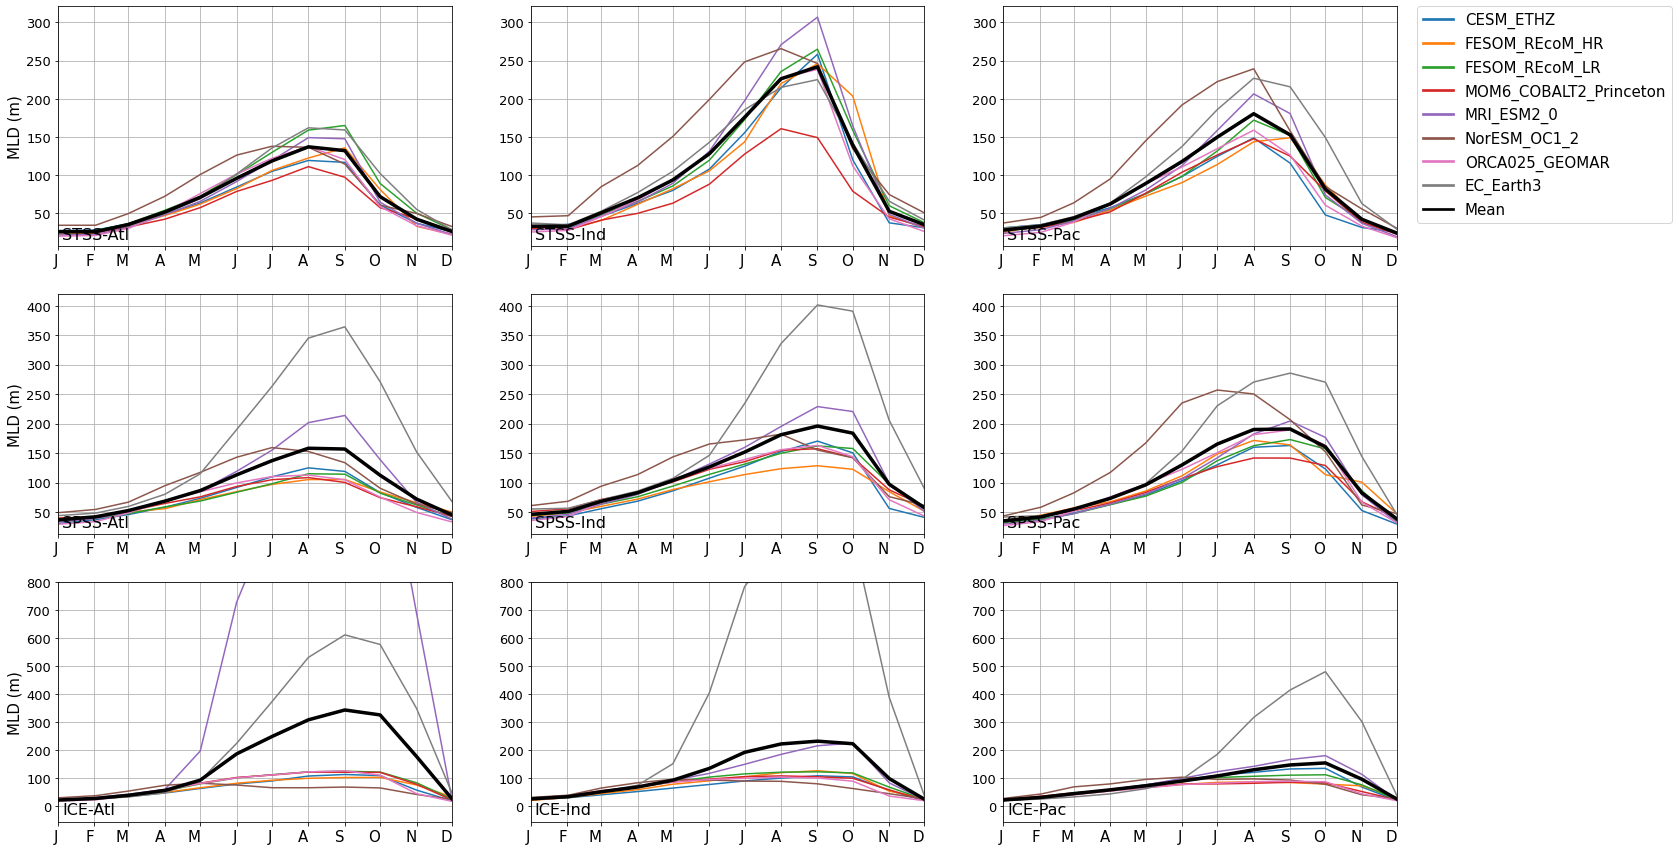

In [77]:
plot_timeseries('mld')

In [ ]:
[plot_timeseries(p) for p in pref[1:None]]

In [44]:
ticks = [np.datetime64('1980-%02d-15'%month) for month in range(1, 13)] # for plotting all the months (ticks)
month_fmt = mdates.DateFormatter('%b')
def m_fmt(x, pos=None): #getting only first letter of Month
    return month_fmt(x)[0]

def plot_timeseries_obs(prefix):
    "Function for plotting          "
    "prefix = variable to be plotted"
    pref = prefix
    models_plot = models.copy()
    axis_lim = np.zeros((3,3))
    axis_lim_min = np.zeros((3,3))
    #to remove from models list if the models does not have the specific variable
    if pref == 'po4os':
        rem_list = ['FESOM_REcoM_LR', 'FESOM_REcoM_HR']
        [models_plot.pop(key, None) for key in rem_list]
    if pref == 'fice':
        models_plot.pop('EC_Earth3', None)
        
    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (24,15))    
    
    for j in np.arange(0,3):
        dic_atl = globals()[pref + suffix[j]]
        dic_ind = globals()[pref + suffix[j+3]]
        dic_pac = globals()[pref + suffix[j+6]]

    # Atl
    
        for m in models_plot:
            dic_atl[m].plot(ax=axs[j,0], linewidth = 1, color = 'tab:green', alpha=0.7)
        dic_atl.mod_mean.plot(ax=axs[j,0], color = 'tab:green', linewidth = 3.5)
        dic_atl.obs.plot(ax=axs[j,0], color = 'tab:blue', linewidth = 3.5)
        axs[j,0].fill_between(dic_atl.time.values, dic_atl.mod_mean - dic_atl.mod_std, 
                         dic_atl.mod_mean + dic_atl.mod_std, alpha = 0.1, color ='tab:green')
        axs[j,0].set_xlabel(None)
        axs[j,0].margins(x=0)
        axis_lim_min[j,0] = axs[j,0].get_ylim()[0]
        axis_lim[j,0] = axs[j,0].get_ylim()[1]
        
        
        # y_labels
        if prefix == 'dissicos':
            axs[j,0].set_ylabel('DISSICOS (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'fice':
            axs[j,0].set_ylabel('FICE', fontsize = 15)
        if prefix == 'spco2':
            axs[j,0].set_ylabel('SPCO2 ($\mu$atm)', fontsize = 15)
        if prefix == 'tos':
            axs[j,0].set_ylabel('TOS ($^{\circ}$C)', fontsize = 15)
        if prefix == 'sos':
            axs[j,0].set_ylabel('SOS', fontsize = 15)
        if prefix == 'no3os':
            axs[j,0].set_ylabel('NO3OS (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'po4os':
            axs[j,0].set_ylabel('PO4OS (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'mld':
            axs[j,0].set_ylabel('MLD (m)', fontsize = 15)
        if prefix == 'talkos':
            axs[j,0].set_ylabel('TALKOS (mol m$^{-3}$)', fontsize = 15)

    # Ind
        for m in models_plot:
            dic_ind[m].plot(ax=axs[j,1], linewidth = 1, color = 'tab:green', alpha=0.7)
        dic_ind.mod_mean.plot(ax=axs[j,1], color = 'tab:green', linewidth = 3.5)
        dic_ind.obs.plot(ax=axs[j,1], color = 'tab:blue', linewidth = 3.5)
        axs[j,1].fill_between(dic_ind.time.values, dic_ind.mod_mean - dic_ind.mod_std, 
                         dic_ind.mod_mean + dic_ind.mod_std, alpha = 0.1, color ='tab:green')
        axs[j,1].set_ylabel(None)
        axs[j,1].set_xlabel(None)
        axs[j,1].margins(x=0)
        axis_lim_min[j,1] = axs[j,1].get_ylim()[0]
        axis_lim[j,1] = axs[j,1].get_ylim()[1]

    # Pac
        for m in models_plot:
            dic_pac[m].plot(ax=axs[j,2], linewidth = 1, label = '_', color = 'tab:green', alpha=0.7)
        dic_pac.mod_mean.plot(ax=axs[j,2], color = 'tab:green', linewidth = 3.5, label = 'Models')
        dic_pac.obs.plot(ax=axs[j,2], color = 'tab:blue', linewidth = 3.5, label = 'Data-products')
        axs[j,2].fill_between(dic_pac.time.values, dic_pac.mod_mean - dic_pac.mod_std, 
                         dic_pac.mod_mean + dic_pac.mod_std, alpha = 0.1, color ='tab:green')
        axs[j,2].set_ylabel(None)
        axs[j,2].set_xlabel(None)
        axs[j,2].margins(x=0)
        axis_lim_min[j,2] = axs[j,2].get_ylim()[0]
        axis_lim[j,2] = axs[j,2].get_ylim()[1]

        
    # adding text to the plot
    axs[0,0].text(0.01, 0.03,'STSS-Atl', color='k', transform=axs[0,0].transAxes, fontsize = 16)
    axs[1,0].text(0.01, 0.03,'SPSS-Atl', color='k', transform=axs[1,0].transAxes, fontsize = 16)
    axs[2,0].text(0.01, 0.03,'ICE-Atl', color='k', transform=axs[2,0].transAxes, fontsize = 16)
    
    axs[0,1].text(0.01, 0.03,'STSS-Ind', color='k', transform=axs[0,1].transAxes, fontsize = 16)
    axs[1,1].text(0.01, 0.03,'SPSS-Ind', color='k', transform=axs[1,1].transAxes, fontsize = 16)
    axs[2,1].text(0.01, 0.03,'ICE-Ind', color='k', transform=axs[2,1].transAxes, fontsize = 16)
        
    axs[0,2].text(0.01, 0.03,'STSS-Pac', color='k', transform=axs[0,2].transAxes, fontsize = 16)
    axs[1,2].text(0.01, 0.03,'SPSS-Pac', color='k', transform=axs[1,2].transAxes, fontsize = 16)
    axs[2,2].text(0.01, 0.03,'ICE-Pac', color='k', transform=axs[2,2].transAxes, fontsize = 16)  
    
    #ticks parameters
    for i in np.arange(0,3):
        axs[0,i].set_ylim(bottom = axis_lim_min[0,:].min(), top = axis_lim[0,:].max())
        axs[1,i].set_ylim(bottom = axis_lim_min[1,:].min(), top = axis_lim[1,:].max())
        
        if pref == 'mld':
            axs[2,i].set_ylim(bottom = axis_lim_min[2,:].min(), top = 800)
        else:
            axs[2,i].set_ylim(bottom = axis_lim_min[2,:].min(), top = axis_lim[2,:].max())

    for ax in axs.flat:
        ax.yaxis.set_tick_params(labelsize = 15)
        ax.grid()
        ax.xaxis.set_tick_params(rotation=0, labelsize = 15)
        ax.set_xticks(ticks)
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(m_fmt))
    
    #adding legend next to the plot
    #leg = axs[0,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=15)
    leg = axs[0,2].legend(loc='lower right', fontsize=14)
    
    for line in leg.get_lines():
        line.set_linewidth(2.7)
    
    savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
    plt.savefig(savepath + 'reccap2_' + pref + '_SeasonalTimeseries_obs.png', format='png', facecolor="w",  bbox_inches='tight')

In [ ]:
mld

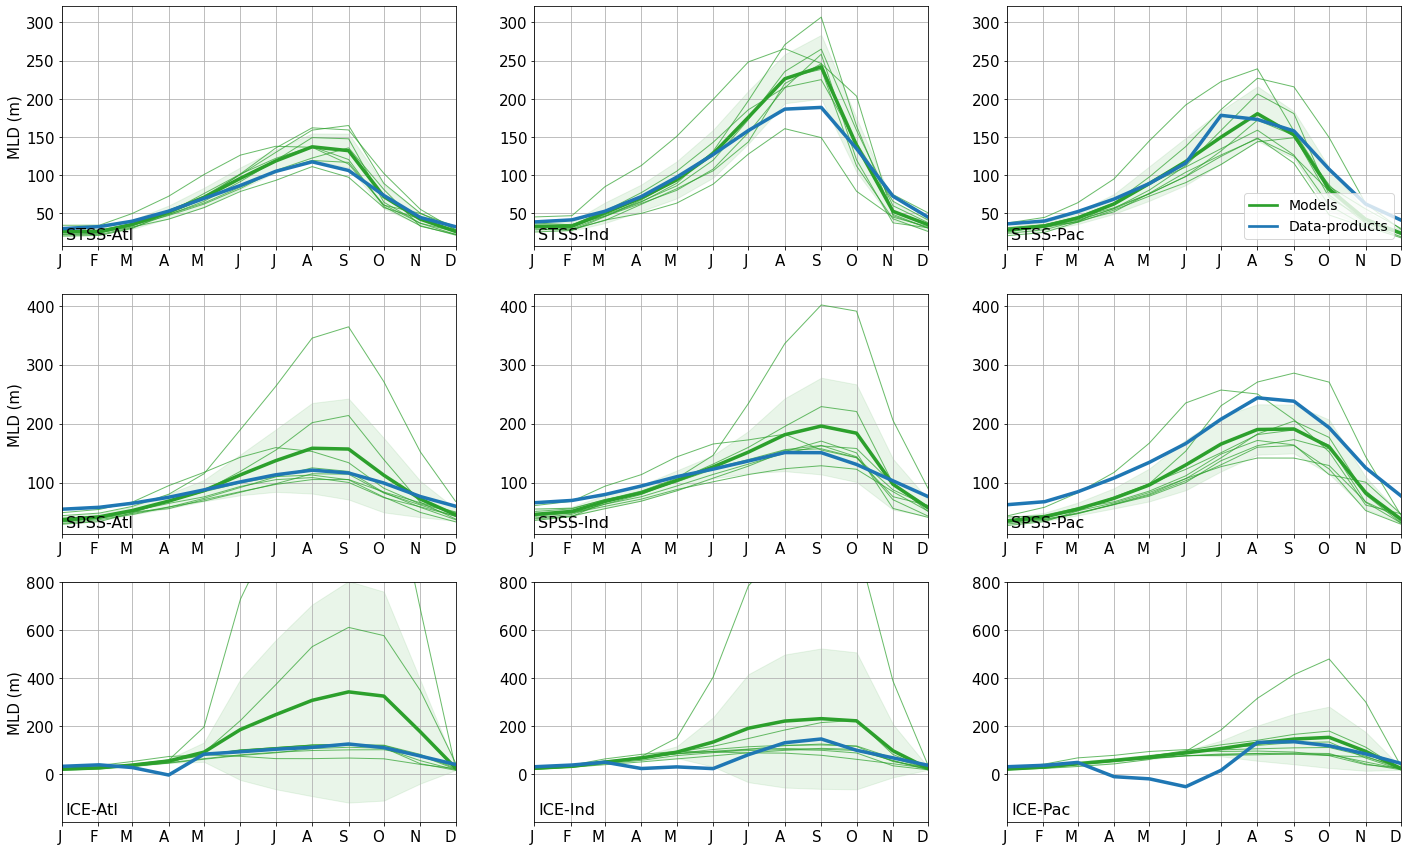

In [45]:
plot_timeseries_obs('mld')

In [110]:
mld.

['fice', 'mld', 'no3os', 'po4os', 'sos', 'spco2', 'talkos', 'tos']

### Anomalies with respect to the annual mean

In [112]:
ticks = [np.datetime64('1980-%02d-15'%month) for month in range(1, 13)] # for plotting all the months (ticks)
month_fmt = mdates.DateFormatter('%b')
def m_fmt(x, pos=None): #getting only first letter of Month
    return month_fmt(x)[0]

def plot_timeseries_obs_anom(prefix):
    "Function for plotting          "
    "prefix = variable to be plotted"
    pref = prefix
    models_plot = models.copy()
    axis_lim = np.zeros((3,3))
    axis_lim_min = np.zeros((3,3))
    #to remove from models list if the models does not have the specific variable
    if pref == 'po4os':
        rem_list = ['FESOM_REcoM_LR', 'FESOM_REcoM_HR']
        [models_plot.pop(key, None) for key in rem_list]
    if pref == 'fice':
        models_plot.pop('EC_Earth3', None)
        
    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (24,15))    
    
    for j in np.arange(0,3):
        dic_atl = globals()[pref + suffix[j]]
        dic_ind = globals()[pref + suffix[j+3]]
        dic_pac = globals()[pref + suffix[j+6]]

    # Atl
    
        for m in models_plot:
            (dic_atl[m] - dic_atl[m].mean('time')).plot(ax=axs[j,0], linewidth = 1, color = 'tab:green', alpha=0.7)
        (dic_atl.mod_mean - dic_atl.mod_mean.mean('time')).plot(ax=axs[j,0], color = 'tab:green', linewidth = 3.5)
        (dic_atl.obs - dic_atl.obs.mean('time')).plot(ax=axs[j,0], color = 'tab:blue', linewidth = 3.5)
        axs[j,0].fill_between(dic_atl.time.values, (dic_atl.mod_mean - dic_atl.mod_mean.mean('time')) - dic_atl.mod_std_anom, 
                         (dic_atl.mod_mean - dic_atl.mod_mean.mean('time')) + dic_atl.mod_std_anom, alpha = 0.1, color ='tab:green')
        axs[j,0].set_xlabel(None)
        axs[j,0].margins(x=0)
        axis_lim_min[j,0] = axs[j,0].get_ylim()[0]
        axis_lim[j,0] = axs[j,0].get_ylim()[1]
        
        
        # y_labels
        if prefix == 'dissicos':
            axs[j,0].set_ylabel('DISSICOS ANOM (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'fice':
            axs[j,0].set_ylabel('FICE ANOM', fontsize = 15)
        if prefix == 'spco2':
            axs[j,0].set_ylabel('SPCO2 ANOM ($\mu$atm)', fontsize = 15)
        if prefix == 'tos':
            axs[j,0].set_ylabel('TOS ANOM ($^{\circ}$C)', fontsize = 15)
        if prefix == 'sos':
            axs[j,0].set_ylabel('SOS ANOM', fontsize = 15)
        if prefix == 'no3os':
            axs[j,0].set_ylabel('NO3OS ANOM (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'po4os':
            axs[j,0].set_ylabel('PO4OS ANOM (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'mld':
            axs[j,0].set_ylabel('MLD ANOM (m)', fontsize = 15)
        if prefix == 'talkos':
            axs[j,0].set_ylabel('TALKOS ANOM (mol m$^{-3}$)', fontsize = 15)

    # Ind
        for m in models_plot:
            (dic_ind[m] - dic_ind[m].mean('time')).plot(ax=axs[j,1], linewidth = 1, color = 'tab:green', alpha=0.7)
        (dic_ind.mod_mean - dic_ind.mod_mean.mean('time')).plot(ax=axs[j,1], color = 'tab:green', linewidth = 3.5)
        (dic_ind.obs - dic_ind.obs.mean('time')).plot(ax=axs[j,1], color = 'tab:blue', linewidth = 3.5)
        axs[j,1].fill_between(dic_ind.time.values, (dic_ind.mod_mean - dic_ind.mod_mean.mean('time')) - dic_ind.mod_std_anom, 
                         (dic_ind.mod_mean - dic_ind.mod_mean.mean('time')) + dic_ind.mod_std_anom, alpha = 0.1, color ='tab:green')
        axs[j,1].set_ylabel(None)
        axs[j,1].set_xlabel(None)
        axs[j,1].margins(x=0)
        axis_lim_min[j,1] = axs[j,1].get_ylim()[0]
        axis_lim[j,1] = axs[j,1].get_ylim()[1]

    # Pac
        for m in models_plot:
            (dic_pac[m] - dic_pac[m].mean('time')).plot(ax=axs[j,2], linewidth = 1, label = '_', color = 'tab:green', alpha=0.7)
        (dic_pac.mod_mean - dic_pac.mod_mean.mean('time')).plot(ax=axs[j,2], color = 'tab:green', linewidth = 3.8, label = 'Models')
        (dic_pac.obs - dic_pac.obs.mean('time')).plot(ax=axs[j,2], color = 'tab:blue', linewidth = 3.8, label = 'Data-products')
        axs[j,2].fill_between(dic_pac.time.values, (dic_pac.mod_mean - dic_pac.mod_mean.mean('time')) - dic_pac.mod_std_anom, 
                         (dic_pac.mod_mean - dic_pac.mod_mean.mean('time')) + dic_pac.mod_std_anom, alpha = 0.1, color ='tab:green')
        axs[j,2].set_ylabel(None)
        axs[j,2].set_xlabel(None)
        axs[j,2].margins(x=0)
        axis_lim_min[j,2] = axs[j,2].get_ylim()[0]
        axis_lim[j,2] = axs[j,2].get_ylim()[1]

        
    # adding text to the plot
    axs[0,0].text(0.01, 0.03,'STSS-Atl', color='k', transform=axs[0,0].transAxes, fontsize = 16)
    axs[1,0].text(0.01, 0.03,'SPSS-Atl', color='k', transform=axs[1,0].transAxes, fontsize = 16)
    axs[2,0].text(0.01, 0.03,'ICE-Atl', color='k', transform=axs[2,0].transAxes, fontsize = 16)
    
    axs[0,1].text(0.01, 0.03,'STSS-Ind', color='k', transform=axs[0,1].transAxes, fontsize = 16)
    axs[1,1].text(0.01, 0.03,'SPSS-Ind', color='k', transform=axs[1,1].transAxes, fontsize = 16)
    axs[2,1].text(0.01, 0.03,'ICE-Ind', color='k', transform=axs[2,1].transAxes, fontsize = 16)
        
    axs[0,2].text(0.01, 0.03,'STSS-Pac', color='k', transform=axs[0,2].transAxes, fontsize = 16)
    axs[1,2].text(0.01, 0.03,'SPSS-Pac', color='k', transform=axs[1,2].transAxes, fontsize = 16)
    axs[2,2].text(0.01, 0.03,'ICE-Pac', color='k', transform=axs[2,2].transAxes, fontsize = 16)  
    
    #ticks parameters
    for i in np.arange(0,3):
        axs[0,i].set_ylim(bottom = axis_lim_min[0,:].min(), top = axis_lim[0,:].max())
        axs[1,i].set_ylim(bottom = axis_lim_min[1,:].min(), top = axis_lim[1,:].max())
        
        if pref == 'mld':
            axs[2,i].set_ylim(bottom = axis_lim_min[2,:].min(), top = 800)
        else:
            axs[2,i].set_ylim(bottom = axis_lim_min[2,:].min(), top = axis_lim[2,:].max())

    for ax in axs.flat:
        ax.yaxis.set_tick_params(labelsize = 15)
        ax.grid()
        ax.xaxis.set_tick_params(rotation=0, labelsize = 15)
        ax.set_xticks(ticks)
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(m_fmt))
    
    #adding legend next to the plot
#     leg = axs[0,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=15)
    leg = axs[0,2].legend(loc='lower right', fontsize=14)
    
    for line in leg.get_lines():
        line.set_linewidth(2.7)
    
    savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
    plt.savefig(savepath + 'reccap2_' + pref + '_SeasonalTimeseries_obs_anom.png', format='png', facecolor="w",  bbox_inches='tight')

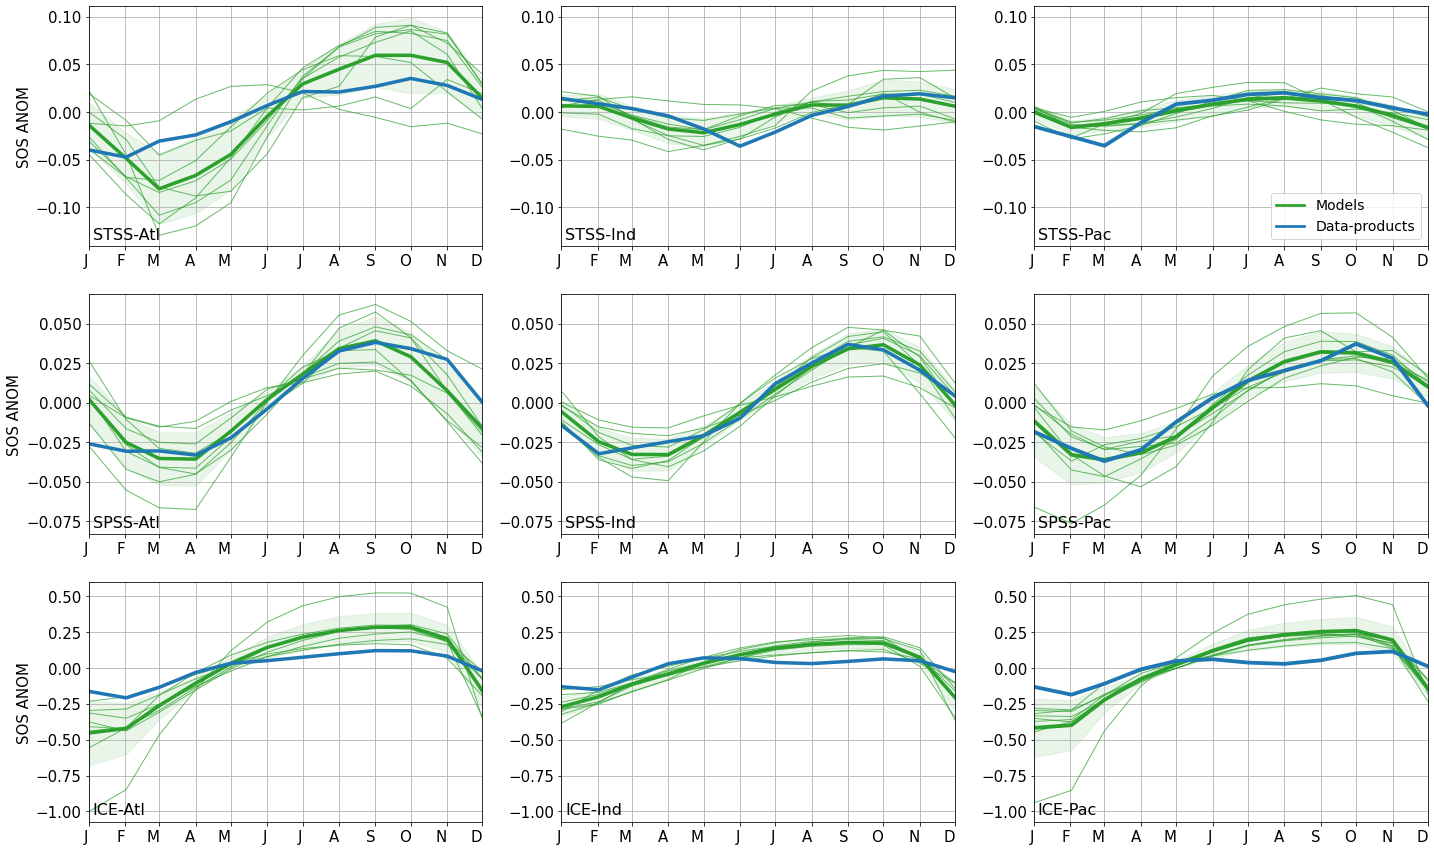

In [114]:
plot_timeseries_obs_anom('sos')

In [ ]:
talkos.obs - talkos.obs.mean('time')

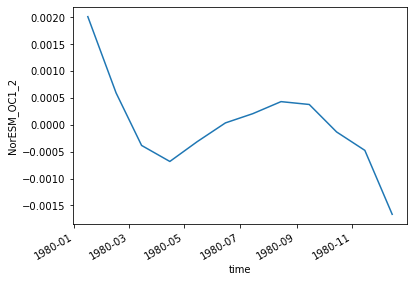

In [74]:
(talkos_atl_SPSS.NorESM_OC1_2 - talkos_atl_SPSS.NorESM_OC1_2.mean('time')).plot()